# Linear Regression

Linear regression is probably the simplest approach for statistical learning. Linear Regression is used for predictive analysis. It is a technique which explains the degree of relationship between two or more variables (multiple regression, in that case) using a best fit line / plane. Simple Linear Regression is used when we have, one independent variable and one dependent variable.<br>

Regression technique tries to fit a single line through a scatter plot.<br>
Linear regression is very good to answer the following questions:<br>
+ Is there a relationship between 2 variables?
+ How strong is the relationship?
+ Which variable contributes the most?
+ How accurately can we estimate the effect of each variable?
+ How accurately can we predict the target?
+ Is the relationship linear?
+ Is there an interaction effect?
+ Estimating the coefficients

Let’s assume we only have one variable and one target. Then, linear regression is expressed as:
<center>y = mx+b</center>
where, <br>

In the equation above, the m and b are the coefficients. These coefficients are what we need in order to make predictions with our model.

#### So how do we find these parameters?<br>
To find the parameters, we need to minimize the least squares or the sum of squared errors. Of course, the linear model is not perfect and it will not predict all the data accurately, meaning that there is a difference between the actual value and the prediction. The error is easily calculated with:<br>


#### But why are the errors squared?<br>
We square the error, because the prediction can be either above or below the true value, resulting in a negative or positive difference respectively. If we did not square the errors, the sum of errors could decrease because of negative differences and not because the model is a good fit.<br>
Also, squaring the errors penalizes large differences, and so the minimizing the squared errors “guarantees” a better model.Z

After some math that is too heavy for this article, you can finally estimate the coefficients with the following equations:


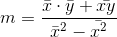

and

### Estimate the relevancy of the coefficients
<b>Now that you have coefficients, how can you tell if they are relevant to predict your target?</b><br>
The best way is to find the p-value. The p-value is used to quantify statistical significance; it allows to tell whether the null hypothesis is to be rejected or not.

So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.

### Assess the accuracy of the model
You found out that your variable was statistically significant by finding its p-value.<br>
Now, how do you know if your linear model is any good?<br>
To assess that, we usually use the R² statistic.

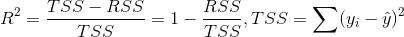

As for the R² metric, it measures the <b>proportion of variability in the target that can be explained using a feature X. </b>Therefore, assuming a linear relationship, if feature X can explain (predict) the target, then the proportion is high and the R² value will be close to 1. If the opposite is true, the R² value is then closer to 0.

# Multivariate regression
In real life situations, there will never be a single feature to predict a target. So, do we perform linear regression on one feature at a time? Of course not. We simply perform multiple linear regression.
The equation is very similar to simple linear regression; simply add the number of predictors and their corresponding coefficients:

### Assess the relevancy of a predictor
Previously, in simple linear regression, we assess the relevancy of a feature by finding its p-value.<br>
In the case of multiple linear regression, we use another metric: the F-statistic.


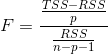


Here, the F-statistic is calculated for the overall model, whereas the p-value is specific to each predictor. If there is a strong relationship, then F will be much larger than 1. Otherwise, it will be approximately equal to 1.

### Assess the accuracy of the model
Just like in simple linear regression, the R² can be used for multiple linear regression. However, know that adding more predictors will always increase the R² value, because the model will necessarily better fit the training data.<br>
Yet, this does not mean it will perform well on test data (making predictions for unknown data points).

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
# as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are 
# available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. 
# The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at 
# statsmodels.org.


In [2]:
data = pd.read_csv("C:\\Users\\spras\\Desktop\\Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


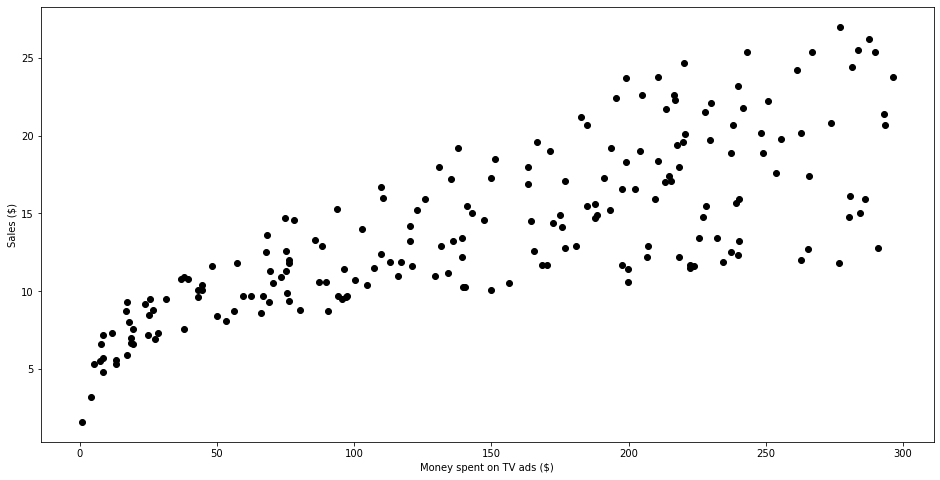

In [5]:
# Modelling
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [7]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

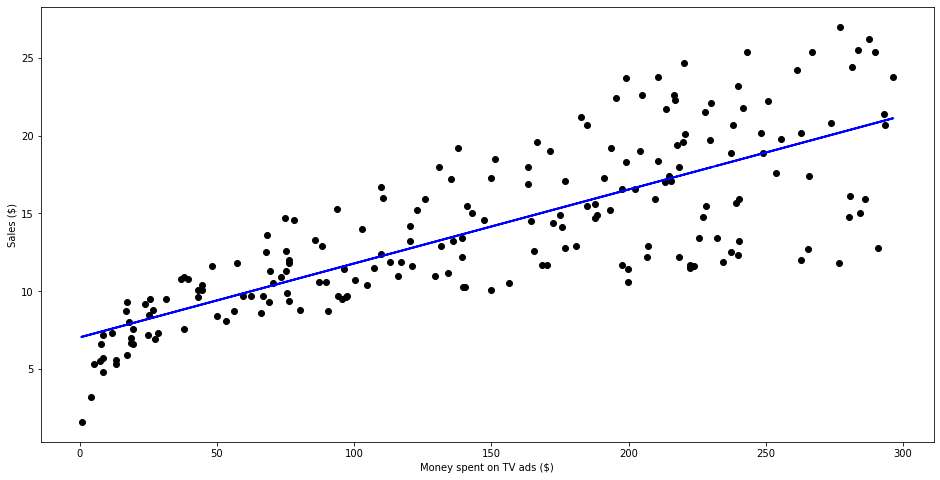

In [8]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [9]:
X = data['TV']
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

C:\Users\spras\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.47e-42
Time:                        18:06:06   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Then, looking at the R² value, we have 0.612. Therefore,<b> about 60% of the variability of sales is explained by the amount spent on TV ads.</b> This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on newspaper and radio ads must have a certain impact on sales.<br>
<br>Let’s see if a multiple linear regression will perform better.
# Multiple Linear Regression


In [12]:
# MOdelling

Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        18:14:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

<b>Things get much more complicated when your multiple independent variables are related to with each other. This phenomenon is known as Multicollinearity. This is undesirable.  To avoid such situation, it is advisable to look for Variance Inflation Factor (VIF). For no multicollinearity, VIF should be \( VIF < 2 \) In case of high VIF, look for correlation table to find highly correlated variables and drop one of correlated ones.</b>

# Polynomial Regression Multicollinearity

This phenomenon exists when the independent variables are found to be moderately or highly correlated. In a model with correlated variables, it becomes a tough task to figure out the true relationship of a predictors with response variable. In other words, it becomes difficult to find out which variable is actually contributing to predict the response variable.<br>

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters.<br>

Also, when predictors are correlated, the estimated regression coefficient of a correlated variable depends on which other predictors are available in the model. If this happens, you’ll end up with an incorrect conclusion that a variable strongly / weakly affects target variable. Since, even if you drop one correlated variable from the model, its estimated regression coefficients would change. That’s not good!<br>

<b>How to check:</b> You can use scatter plot to visualize correlation effect among variables. Also, you can also use VIF factor. VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

# Autocorrelation Heteroscedasticity

The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.
<br>
<b>How to check:</b> You can look at residual vs fitted values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern. Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.
To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

<b> There are two basic kinds of multicollinearity:</b><br>

<b>Structural multicollinearity:</b> This type occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.<br>
<b>Data multicollinearity:</b> This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.

<b>Multicollinearity causes the following two basic types of problems:</b><br>

+ The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
+ Multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

Note: For more reading visit
<a href="https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/">here</a>